In [1]:
from __future__ import division
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#import geopandas as gpd #pip install geopandas

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv('AB_NYC_2019.csv')

print('Number of features: %s' %data.shape[1])
print('Number of examples: %s' %data.shape[0])

Number of features: 16
Number of examples: 48895


In [4]:
data.head().append(data.tail())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
data.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [8]:
# Evaluation_1-top_3_hosts

top_3_hosts = (pd.DataFrame(data.host_id.value_counts())).head(3)
top_3_hosts.columns=['Listings']
top_3_hosts['host_id'] = top_3_hosts.index
top_3_hosts.reset_index(drop=True, inplace=True)
top_3_hosts

,Listings,host_id
0,327,219517861
1,232,107434423
2,121,30283594


In [9]:
# Evaluation_1-top_3_neighbourhood_groups

top_3_neigh = (pd.DataFrame(data.neighbourhood_group.value_counts())).head(3)
top_3_neigh.columns=['Listings']
top_3_neigh['neighbourhood_group'] = top_3_neigh.index
top_3_neigh.reset_index(drop=True, inplace=True)
top_3_neigh

,Listings,neighbourhood_group
0,21661,Manhattan
1,20104,Brooklyn
2,5666,Queens


In [31]:
wordcloud = WordCloud(background_color='white').generate(" ".join(data.neighbourhood))
display(wordcloud)

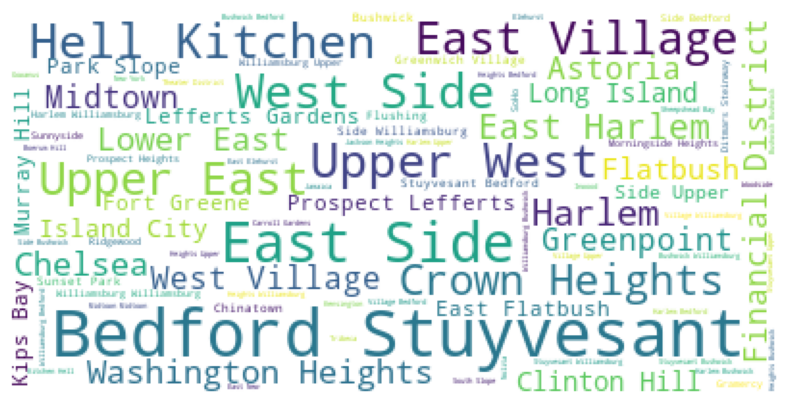

In [37]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud = WordCloud(background_color='white').generate(" ".join(data.neighbourhood))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [11]:
#data cleaning 
data.drop(['id','host_id','host_name','last_review'],axis=1,inplace=True)

In [12]:
data.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
data_check_distrib=data.drop(data[pd.isnull(data.reviews_per_month)].index)

{"Mean":np.nanmean(data.reviews_per_month),"Median":np.nanmedian(data.reviews_per_month),
 
 "Standard Dev":np.nanstd(data.reviews_per_month)}

{'Mean': 1.3732214298586618,
 'Median': 0.72,
 'Standard Dev': 1.6804203639276272}

In [14]:
def impute_median(series):
    return series.fillna(series.median())

(0.01, 58.5)

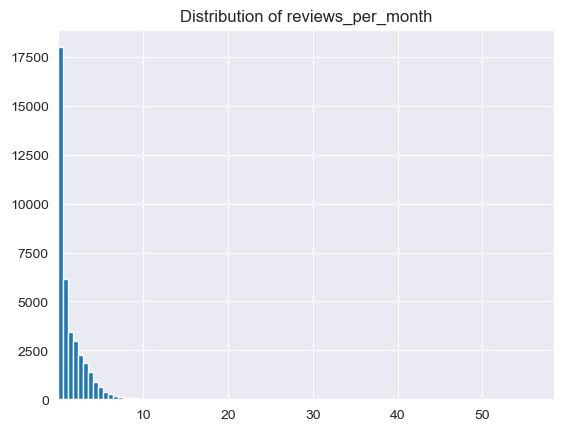

In [45]:
# plot a histogram 
plt.hist(data_check_distrib.reviews_per_month,  bins=100)
plt.title("Distribution of reviews_per_month")
plt.xlim((min(data_check_distrib.reviews_per_month), max(data_check_distrib.reviews_per_month)))

In [16]:
def impute_median(series):
    return series.fillna(series.median())

In [17]:
data.reviews_per_month=data["reviews_per_month"].transform(impute_median)

In [56]:
data

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.72,2,9
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.72,2,36
48892,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.72,1,27
48893,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.72,6,2


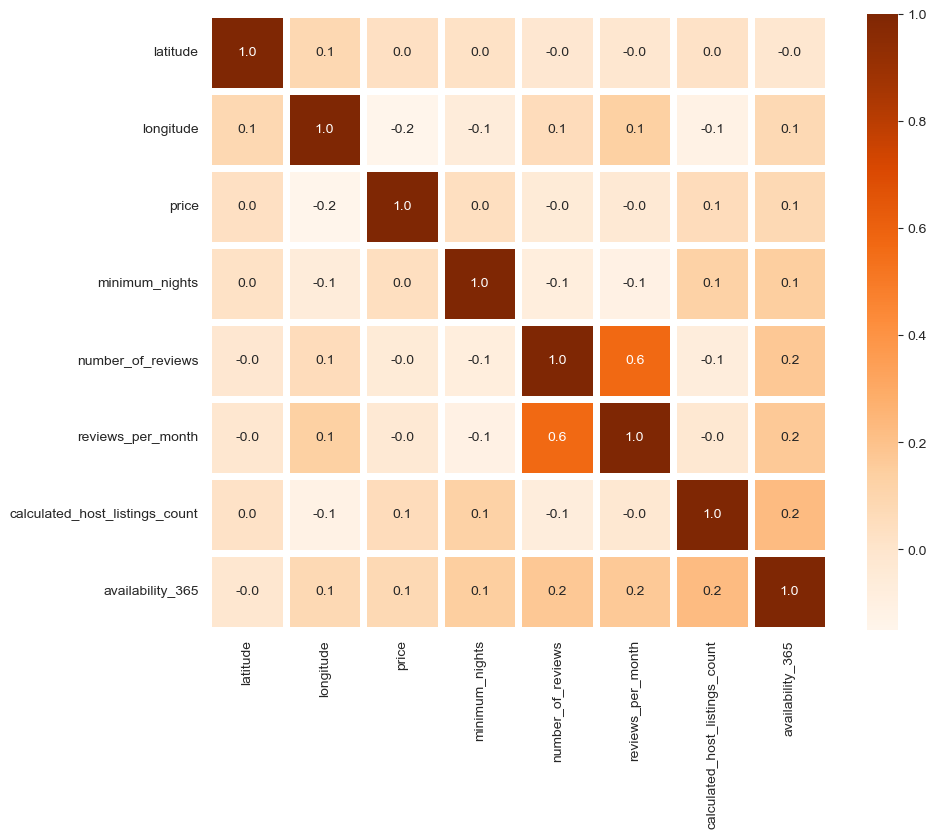

In [60]:
data['reviews_per_month'].fillna(value=0, inplace=True)

f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax, cmap='Oranges')
plt.show()